___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 101
   
   Predicting ...
   Predicting - done. Time (sec):  0.0201714
   
   Prediction time/pt. (sec) :  0.0001997
   


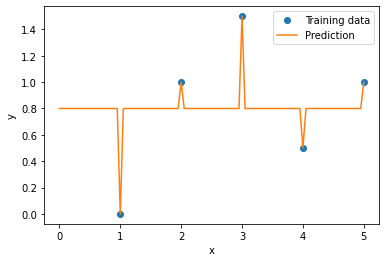

In [3]:
# This part do a surrogate model using Gower's distance.
# It can only be use to 

import numpy as np
import matplotlib.pyplot as plt
from smt.sampling_methods import LHS
from smt.surrogate_models import KRG
from smt.applications.mixed_integer import MixedIntegerSurrogate, INT
from smt.applications.mixed_integer import (
    FLOAT,
    INT,
    ENUM,
    MixedIntegerSamplingMethod,
)

# xtypes = [FLOAT, INT, (ENUM, 3), (ENUM, 2)]
# FLOAT means x1 continuous
# INT means x2 integer
# (ENUM, 3) means x3, x4 & x5 are 3 levels of the same categorical variable
# (ENUM, 2) means x6 & x7 are 2 levels of the same categorical variable

xt = np.linspace(1.0, 5.0, 5)
x_train = np.array(["%.2f" % i for i in xt],dtype=object)
yt = np.array([0.0, 1.0, 1.5, 0.5, 1.0])

xlimits =  [["0.0", "1.0"," 2.0", "3.0", "4.0"]]

sm = MixedIntegerSurrogate(type_surrogate = 'Gower',xtypes=[(ENUM,5)], xlimits=xlimits, surrogate=KRG(theta0=[1e-2]))
sm.set_training_values(x_train, yt)
sm.train()

num = 101
x = np.linspace(0, 5, num)
x_pred = np.array(["%.2f" % i for i in x],dtype=object)

y = sm.predict_values(x_pred)

plt.plot(xt, yt, "o")
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Training data", "Prediction"])
plt.show()


___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
[[1.00000000e+00 1.05466143e-01 1.23723515e-04 1.61442383e-09
  2.34319803e-16]
 [1.00000000e+00 1.05466143e-01 1.23723515e-04 1.61442383e-09
  2.34319803e-16]
 [1.00000000e+00 1.05466143e-01 1.23723515e-04 1.61442383e-09
  2.34319803e-16]
 [1.00000000e+00 1.05466143e-01 1.23723515e-04 1.61442383e-09
  2.34319803e-16]
 [1.00000000e+00 1.05466143e-01 1.23723515e-04 1.61442383e-09
  2.34319803e-16]
 [1.00000000e+00 1.05466143e-01 1.23723515e-04 1.61442383e-09
  2.34319803e-16]
 [1.00000000e+00 1.05466143e-01 1.23723515e-04 1.61442383e-09
  2.34319803e-16]
 [1.00000000e+00 1.05466143e-01 1.23723515e-04 1.61442383e-09
  2.34319803e-16]
 [1.00000000e+00 1.05466143e-01 1.23723515e-04 1.61442383e-09
  2.34319803e-16]
 [1.00000000e+00 1.05466143e-01 1.23723515e-04 1.61442383e-09
  2.34319803e-16]
 [1.00000000e+00 1.05466143e-01 1.23723515e-04 1.614423

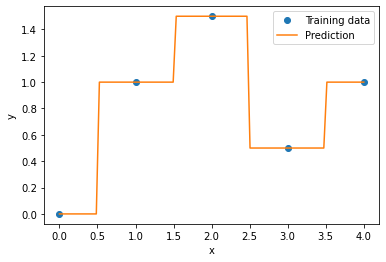

In [5]:
# This part do a surrogate model using Continuous relaxation. 

import numpy as np
import matplotlib.pyplot as plt
from smt.surrogate_models import QP
from smt.applications.mixed_integer import MixedIntegerSurrogate, INT

xt = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
yt = np.array([0.0, 1.0, 1.5, 0.5, 1.0])

# xtypes = [FLOAT, INT, (ENUM, 3), (ENUM, 2)]
# FLOAT means x1 continuous
# INT means x2 integer
# (ENUM, 3) means x3, x4 & x5 are 3 levels of the same categorical variable
# (ENUM, 2) means x6 & x7 are 2 levels of the same categorical variable

sm = MixedIntegerSurrogate(type_surrogate = 'continuous relaxation',xtypes=[INT], xlimits=[[0, 4]], surrogate=KRG(theta0=[1e-2]))
sm.set_training_values(xt, yt)
sm.train()

num = 100
x = np.linspace(0.0, 4.0, num)
y = sm.predict_values(x)

plt.plot(xt, yt, "o")
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Training data", "Prediction"])
plt.show()